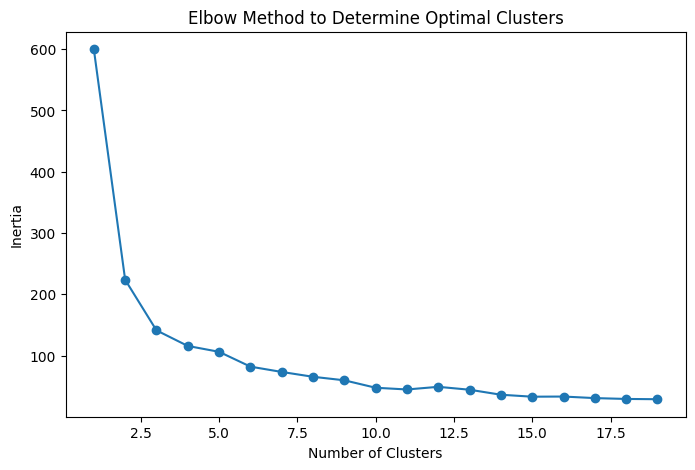

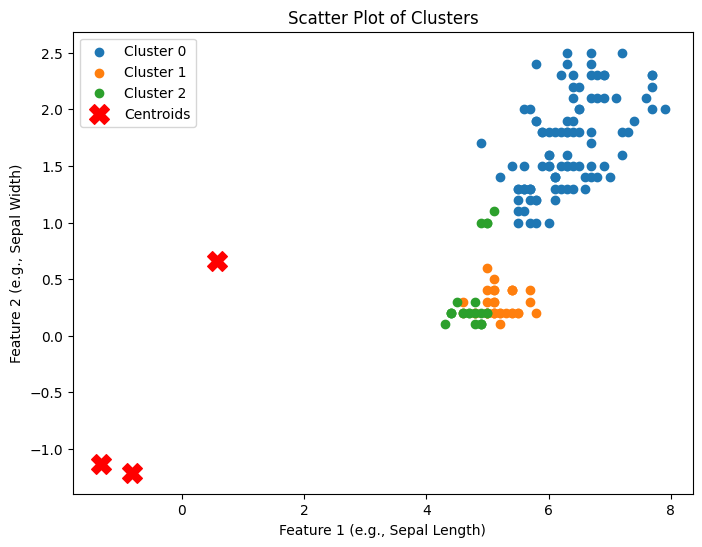

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess data
SS = StandardScaler()
df = pd.read_csv("Iris.csv")
df.drop(columns=["Species", "Id"], axis=1, inplace=True)
df_scaled = SS.fit_transform(df)

# Determine optimal number of clusters using inertia
inertias = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, init="k-means++")
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), inertias, marker="o")
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Perform clustering
km = KMeans(n_clusters=3, init="k-means++", random_state=42)
km.fit(df_scaled)
pred = km.predict(df_scaled)
df["Cluster"] = pred

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Change the range if the number of clusters changes
    cluster_points = df[df["Cluster"] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0],  # First feature (e.g., SepalLengthCm)
        cluster_points.iloc[:, 3],  # Second feature (e.g., SepalWidthCm)
        label=f"Cluster {cluster}"
    )

plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 3],
    s=200,
    c="red",
    marker="X",
    label="Centroids"
)

plt.title("Scatter Plot of Clusters")
plt.xlabel("Feature 1 (e.g., Sepal Length)")
plt.ylabel("Feature 2 (e.g., Sepal Width)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Data
a = [185, 170, 168, 179, 182, 188, 180, 180, 183, 180, 180, 177]
b = [72, 56, 60, 68, 72, 77, 71, 70, 84, 88, 67, 76]

# Create DataFrame
frame = pd.DataFrame({"Height": a, "Weight": b})

# Initial centroids
initial_centroids = np.array([[185, 72], [170, 56]])

# KMeans clustering
km = KMeans(n_clusters=2, init=initial_centroids, n_init=1, random_state=42)
km.fit(frame)
pred = km.predict(frame)

# Add clusters to the DataFrame
frame["Cluster"] = pred

# Print the DataFrame with cluster assignments
print(frame)


    Height  Weight  Cluster
0      185      72        0
1      170      56        1
2      168      60        1
3      179      68        0
4      182      72        0
5      188      77        0
6      180      71        0
7      180      70        0
8      183      84        0
9      180      88        0
10     180      67        0
11     177      76        0
